# Dataset Pre-Processing
### This Notebook contains the code which carries out the dataset preprocessing before it is used in both the binary and multiclass tasks in the assessment. 
### This code carries our the following processes:<br/> 1. Takes the Original label csv files and converts them into appropriate formats for both tasks <br/>2. Takes the images in the original dataset and resizes them <br/>3. Explores PCA for image dataset to determine optimal number of components to use for PCA

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
#tqdm is for progress bar functionality in code, must be installed for code to function (TO DO: include exception if tqdm not imported )
from tqdm import tqdm
#Importing modules for image dataset preprocessing (Section 4.)
import os
import cv2
#For Image dataset PCA exploration (Section 5)
from sklearn.decomposition import PCA

#Debug to check tensorflow version
print(tf.__version__)

Using TensorFlow backend.


2.1.0


# 1. Exploring the dataset

In [2]:
#Loading the CSV Label file
mri_scan_labels = pd.read_csv('./dataset/label.csv')
print(mri_scan_labels.head())

# 3000 labels for 3000 images
mri_scan_labels.shape

# The collection of MRI images are stored as IMAGE_0000 to _2999 as there are 3000 images with their respective target labels
# There are various labels, no tumor, meningioma glioma and pituitary tumors

        file_name             label
0  IMAGE_0000.jpg  meningioma_tumor
1  IMAGE_0001.jpg          no_tumor
2  IMAGE_0002.jpg  meningioma_tumor
3  IMAGE_0003.jpg      glioma_tumor
4  IMAGE_0004.jpg  meningioma_tumor


(3000, 2)

# 2. Binary Task Dataset Re-labelling

In [4]:
#Taking just the label portion for editing into our Target Y array
Y = mri_scan_labels[['label']]
Y

,label
0,meningioma_tumor
1,no_tumor
2,meningioma_tumor
3,glioma_tumor
4,meningioma_tumor
...,...
2995,no_tumor
2996,meningioma_tumor
2997,glioma_tumor
2998,glioma_tumor


## 2.1 Exploring Dataframe parameter code

In [5]:
#Getting dataframe length parameters
len(Y.index)
#PRINTS 3000
print(Y.shape[0])

#Learning Dataframe indexing
#PRINTS the label of 3rd element, "MENINGIOMA_TUMOR"
print(Y.loc[2].at['label'])

#Referencing dataframe using integer indexes
#ALSO PRINTS the label of 3rd element, "MENINGIOMA_TUMOR"
print(Y.iat[2,0])

# In this case we manipulate the dataframe using np.arrays first so we convert from a dataframe to a np.array
# Converts dataframe to numpy array
Y_np = Y.to_numpy()
#PRINTS 3000
print(len(Y_np))

#Checks indexing for Array
#PRINTS the label of 3rd element in new array, "MENINGIOMA_TUMOR"
print(Y_np[2,0])

#Testing string compare on np array elements
#RETURMS TRUE to compare if the label matches input string "MENINGIOMA_TUMOR"
print(Y_np[2] == 'meningioma_tumor')

#Initialises empty array for Y data for binary task
Y_binary = np.zeros(len(Y_np))
print(Y_binary)
print(Y_binary[2])

3000
meningioma_tumor
meningioma_tumor
3000
meningioma_tumor
[ True]
[0. 0. 0. ... 0. 0. 0.]
0.0


## 2.2 Relabelling based on the requirements
### The Binary task wants us to Build a classifier to identify whether there is a tumor in the MRI images.<br/>Therefore the target labels should just be binary, 0 or 1 indicating the presence of a tumor or not in the MRI image<br/>The type of tumor in this case is not required we just need to know whether it is a tumor or not

In [6]:
#For loop through the number of elements in the label dataset, in this case 3000
#Loop will check if the array element is == to no_tumor in a string compare condition.
#If it returns true, that means the element is labelling no_tumor and therefore we set the corresponding element value of the Y_binary array to 0
#Therefore if the output of the compare returns false, regardless of the type of tumor we set the element value to = 1
#Meaning the target label is showing a tumor in the mri image.

for x in range(len(Y_np)):

    if Y_np[x] == 'no_tumor':
        Y_binary[x] = 0
    else:
        Y_binary[x] = 1

print("Y_binary Label array setup!")

Y_binary Label array setup!
ERROR! Session/line number was not unique in database. History logging moved to new session 231


In [7]:
#Shows the resultant binary numpy array populated with the labels in binary form (comapred to string form originally)
Y_binary

array([1., 0., 1., ..., 1., 1., 1.])

In [10]:
#Converts it into a DataFrame for CSV file storage, this is so the subsequent notebook code can access the created label file
#Also shows successful dataset manipulation for Target classes
Y_Binary_Label = pd.DataFrame(Y_binary, columns = ['MRI_Binary_Label'])


#Value counts checks the number of unique classes in the dataframe, this shows successful relabelling of the dataset labels
Y_Binary_Label.value_counts(['MRI_Binary_Label'])
#From code we see that there are almost 5 times more tumor images than images with no tumor
#Therefore this binary dataset is imbalanced

MRI_Binary_Label
1.0                 2546
0.0                  454
dtype: int64

In [11]:
#Creates the Y_Binary_Label.pkl file for storage locally with the binary labels inputted corresponding to the Image filenames
Y_Binary_Label.to_pickle('./dataset/Y_Binary_Label.pkl')

# 3. Multiclass Task Dataset Re-labelling
### We now relabel the 

In [13]:
#Initialises empty array for Y data for binary task
Y_Multiclass = np.zeros(len(Y_np))
#.value_counts checks the number of unique classes in the dataframe, in this case specifically the label column
#We see 4 unique labels
mri_scan_labels.value_counts(['label'])

#Therefore for the multiclass targets we will arrange them as
#no_tumor = 0
#glioma_tumor = 1
#meningioma_tumor = 2
#pituitary_tumor = 3
#Respectively

label           
glioma_tumor        860
meningioma_tumor    855
pituitary_tumor     831
no_tumor            454
dtype: int64

## 3.1 Relabelling the dataset based on multiclass requirements

### Relabelled label.csv datapoints into 4 integer target classes as described earlier and saving it into a .pkl file for future reference

In [15]:
#For loop runs through array to check which elements are of the different class names
#It will then edit the respective index element in Y_Multiclass with the respective integer label we give to the class
for x in range(len(Y_np)):

    if Y_np[x] == 'no_tumor':
        Y_Multiclass[x] = 0
    
    elif Y_np[x] == 'glioma_tumor':
        Y_Multiclass[x] = 1

    elif Y_np[x] == 'meningioma_tumor':
        Y_Multiclass[x] = 2

    else:
        Y_Multiclass[x] = 3

print("Multiclass label array setup!")

Y_Multiclass

Multiclass label array setup!


array([2., 0., 2., ..., 1., 1., 3.])

In [17]:
#Converts it into a DataFrame for CSV file storage, this is so the subsequent notebook code can access the created label file
#Also shows successful dataset manipulation for Target classes
Y_Multiclass_Label = pd.DataFrame(Y_Multiclass, columns = ['MRI_Multiclass_Label'])

#The unique label counts matches the original file labels
#We also see that the labels are still slightly imbalanced with 0 (no_tumor) having about half the number of samples to the other 3 labels.
Y_Multiclass_Label.value_counts(['MRI_Multiclass_Label'])


MRI_Multiclass_Label
1.0                     860
2.0                     855
3.0                     831
0.0                     454
dtype: int64

In [18]:
#Creates the Y_Multiclass_Label.pkl file for storage locally with the binary labels inputted corresponding to the Image filenames
Y_Multiclass_Label.to_pickle('./dataset/Y_Multiclass_Label.pkl')


# 4. Image Dataset Pre-Processing

### The following section describes the code which carries out pre-processing for the 3000 MRI images and to package them into a database for future reference and to show successful manipulation.<br/>The processes carried out will be justified and explained in the report.

## 4.1 Testing Image handling and manipulation using Opencv

In [20]:
#Testing os.path functionality
#Obtains path to current work directory, will apply differently depending on user's workspace but will allow correct function of code regardless
IMAGEDIR = os.getcwd()
#Tests relative path method
relative_path = os.path.relpath(IMAGEDIR)
print(relative_path)
print(os.getcwd())

.
c:\Users\f4nyt\Documents\GitHub\AMLS_21-22-_SN17081058


### Reading of one Image file to check image parameters

dataset\image\IMAGE_0000.jpg


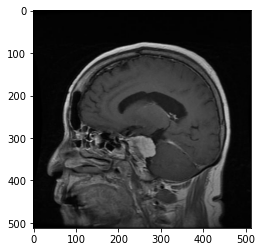

In [19]:
#Path to image files
img_path = 'dataset\image'

#testing filename indexing (NOT USED IN MAIN CODE)
number = 0
img_name = "IMAGE_" + str(number).zfill(4) + '.jpg'
full_path = os.path.join(img_path,img_name)
print(full_path)
#Code reads the image file based on the input arguement path and reads it in  grayscale (2nd input arguement)
img_array = cv2.imread(full_path,cv2.IMREAD_GRAYSCALE)

#Plot to show the first image obtained, should be IMAGE_000.jpg
plt.imshow(img_array, cmap='gray')
plt.show()

#The image printed out can be changed by changing the value of number variable.

In [21]:
#Verify pixel size of images
#in this case its 512 x 512 pixels = 262144 pixels (Features)
print(img_array.shape)

(512, 512)


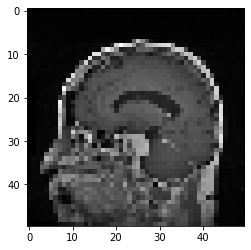

In [22]:
#Resizes the image to 50 * 50 to observe the resultant image quality
resize_img_array = cv2.resize(img_array, (50,50))
plt.imshow(resize_img_array, cmap='gray')
plt.show()
#In this case the image still shows prominent features while being more pixelated compared to the original size (512 * 512)

## 4.2 Retrieving image files from image folder into notebook for pre-processing
### This code obtains all the pixel information of all 3000 images in the dataset and stores it in one list/array for further processing.

In [23]:
#Function which takes in file path and image size arguements and extracts the images from the given path and resizes them to the determined size (square dimensions)
def image_array_resize(file_path,IMG_SIZE):
    #Initialises empty list for population through for loop
    image_data = []

    #For loop will run through all items in the directory listed, in this case the image folder containing all 3000 mri images in our dataset.
    #x in this case will print out the full filename (in this case the name of each IMAGE_xxxx.jpg), therefore we can use it to generate paths to 
    #All the images via the for loop.

    #tqdm just gives a progress bar for image extraction process
    #listdir counts total number of items in the designated folder, in this case the image folder with all the original images
    for x in tqdm(os.listdir(file_path)):
        #Creates path to images per iteration
        image_path = os.path.join(file_path,x)

        #Reads the corresponding image using cv2.imread
        file_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        #Resizes images based on the value of IMG_SIZE
        resize_file_array = cv2.resize(file_array, (IMG_SIZE,IMG_SIZE))
        
        #Stores the image array information into the image_data list created. Append makes sure it adds information in order.
        image_data.append(resize_file_array)

        
        #CODE FOR DEBUGGING
        #print(x)
        #plt.imshow(file_array, cmap='gray')  #graph it
        #plt.show()  #display! 
        #break

    #Converts list into numpy array for easier processing
    image_data_array = np.array(image_data)   
    print("Successfully extracted original Images from dataset!")
    return image_data_array

In [24]:
#We call image_array_resize function twice, once for resizing for SVM with PCA and another for CNN methods later on 

#We set the path to the images in the dataset folder
#Image will be resized to 28 * 28
SVM_Images = image_array_resize('dataset\image',28)

#Do the same for our CNN images resized to 100
CNN_Images = image_array_resize('dataset\image',50)

100%|██████████| 3000/3000 [00:17<00:00, 175.20it/s]


Successfully extracted original Images from dataset!


100%|██████████| 3000/3000 [00:03<00:00, 970.78it/s]

Successfully extracted original Images from dataset!


In [25]:
#Saving CNN_Images 3D array into a file for future reference

#Reshaping from 3D to 2D
CNN_Images_2D = CNN_Images.reshape(CNN_Images.shape[0], -1)

#Saves as a pickle file for future reference
CNN_Images_2D_DF = pd.DataFrame(CNN_Images_2D)
CNN_Images_2D_DF.to_pickle('./dataset/CNN_Images_2D_DF.pkl')



In [26]:
#Verifies the for loop executed correctly, array and list should have 3000 entries.
print(len(SVM_Images))

#Verify the array dimensions.
#Array of imagedata is a 3D Array with 3000 elements with each element containing 28 x 28 pixel data in array format
print(SVM_Images.shape)

3000
(3000, 28, 28)


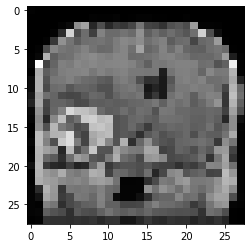

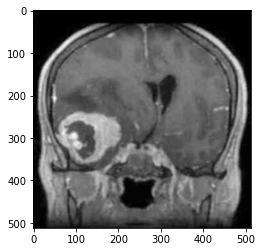

In [27]:
#testing array indexing and whether obtaining image data was successful by calling images in the array, in this case the 3rd image IMAGE_0002.jpg.
# Order of array should match naming in original image file
plt.imshow(SVM_Images[2,:], cmap='gray')
plt.show()

# Comparison to original image 
img_0002 = cv2.imread(".\dataset\image\IMAGE_0002.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img_0002, cmap='gray')
plt.show()

## 4.3 Preparing for PCA
### This section explores the optimal number of components to carry out PCA/<br/>


In [28]:
#Takes the resized images we gathered from the for loop in section 5.2 and reshapes the 3D array into 2D 
#This is because PCA only accepts 2D array inputs
Images_flattened = SVM_Images.reshape(3000, (28 * 28))
print(Images_flattened.shape)
#resultant array is 3000 * 784 with all 784 pixels arranged in a single row instead of 28 * 28

(3000, 784)


### 4.3.1 Exploring Optimal number of principal components for PCA
### We determine the ideal number of principal components to use for PCA with the 28 * 28 images<br/> This lets us reduce the number of features as much as possible while still retaining as much information from the images as possible.<br/> PCA will be done separately for binary and multiclass Tasks

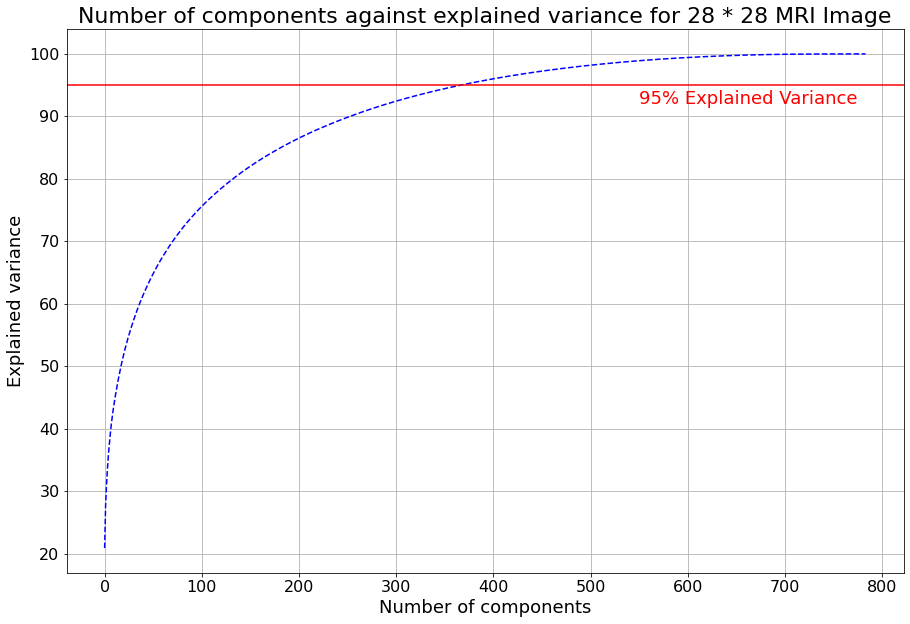

In [53]:
#Carries out PCA on the flattened image array based on the number of features
pca_image = PCA(n_components = Images_flattened.shape[1])
pca_image.fit(Images_flattened)

#We make a scree plot, a line plot of principal components in analysis, to determine numer of components to retain for PCA
#This is done by comparing the Explained Variance percentage against the number of principle components
#We set our threshold for explained variance to be 95%

#Printing the explained variance vs number of components by referencing .explained_variance_ratio_
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.grid()
plt.plot(np.cumsum(pca_image.explained_variance_ratio_ * 100), linestyle='--', color='b')
plt.xlabel('Number of components', fontsize=18)
plt.ylabel('Explained variance', fontsize=18)
plt.title('Number of components against explained variance for 28 * 28 MRI Image', fontsize=22)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

#Printing red line showing the 95% explained variance threshold
plt.axhline(y= 95, color= 'r', linestyle='-')
plt.text(550, 92, '95% Explained Variance', color = 'red', fontsize=18)


#Saves plot to be used in the report
plt.savefig('./Plots/PCA_Components_plot.jpg', bbox_inches='tight')

95.90644762244467
(28, 28)


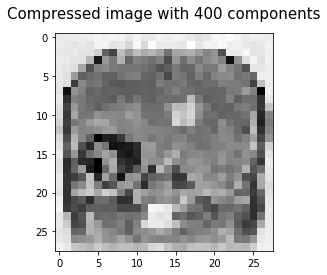

In [54]:
#From the figure we determine that we can use 400 components for PCA
#We carry out PCA here to explore the results. 

pca_400 = PCA(n_components = 400)
pca_400_reduced = pca_400.fit_transform(Images_flattened)

#Inverse transform is used to print the PCA-ed image to show the difference
pca_400_recovered = pca_400.inverse_transform(pca_400_reduced)

#This is just to visualise the PCA-ed images
#Moving forward we want to use the 
image_pca_400 = pca_400_recovered[2,:].reshape([28,28])
plt.imshow(image_pca_400, cmap='gray_r')
plt.title('Compressed image with 400 components', fontsize=15, pad=15)

#This returns the exact explained variance value for n_components = 400
#In this case the value is 95.90869326637919
print(np.cumsum(pca_400.explained_variance_ratio_ * 100)[-1])
print(image_pca_400.shape)

### 4.3.2 Storing Extracted, resized and flattened image array as a csv file for easy future reference
### We can do PCA for the images but the data must be split first<br/> This is because we must do PCA on the training data only (fit and transform it) and then only use the transform on the test data for PCA to prevent any bias<br/> And to prevent the model from having the entire test and training dataset metrics if PCA were to be done on the entire dataset as a whole.<br/> We select 400 components as it provides around 96% explained variance > 95%

In [56]:
#Converts the extracted and flattened image array dataset into a Dataframe for storage
#Saves it as a .pkl file in the dataset folder for future reference by the other notebooks
Image_DF_Flat = pd.DataFrame(Images_flattened)
Image_DF_Flat.to_pickle('./dataset/Image_DF_Flat.pkl')

#Use this to show the dataframe
#Image_DF_Flat
